## SARSA-lambda

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from env_simulator import ToyEnv

In [2]:
env = ToyEnv()

In [34]:
n_states = env.observation_space.shape[0]
n_actions = env.action_space.shape[0]
n_episodes = 2000
gamma = 0.98
epsilon = 1
max_steps_per_ep = 100
learning_rate = 0.5
Lambda = 0.35

In [31]:
Q = np.zeros([n_states, n_actions])

In [5]:
def choose_action(s):
    prob = [float(epsilon)/n_actions]*n_actions
    prob[np.argmax(Q[s,:])] += 1-epsilon
    a = np.random.choice(n_actions,1,p=prob)
    return a[0]

In [35]:
rewards = [] # To hold total reward per episode
avg_rewards = [] # To hold running average of rewards per episode
for ep in range(n_episodes):
    E = np.zeros([n_states, n_actions])
    s,r,done = env.reset()
    a = choose_action(s)
    n_step = 0
    ep_r = 0
    epsilon = 1.0/(ep+1)
    while not done:
        s1,r,done = env.step(a)
        a1 = choose_action(s1)
        delta = r + gamma*Q[s1,a1] - Q[s,a]
        E[s,a] += 1
        Q += learning_rate*delta*E
        E = gamma*Lambda*E
        s = s1
        a = a1
        ep_r += r
        n_step += 1
        if n_step > max_steps_per_ep:
            break
    rewards.append(ep_r)
    avg_rewards.append(sum(rewards[-500:])/500.0)
    if not ep % 100:
        print("Episode #%d : Reward = %f, Avg Rew = %f" % (ep, ep_r, avg_rewards[-1]))    

Episode #0 : Reward = 1.000000, Avg Rew = 0.002000
Episode #100 : Reward = 1.000000, Avg Rew = 0.042000
Episode #200 : Reward = 1.000000, Avg Rew = 0.106000
Episode #300 : Reward = -1.000000, Avg Rew = 0.194000
Episode #400 : Reward = 1.000000, Avg Rew = 0.226000
Episode #500 : Reward = 1.000000, Avg Rew = 0.240000
Episode #600 : Reward = -1.000000, Avg Rew = 0.216000
Episode #700 : Reward = 1.000000, Avg Rew = 0.156000
Episode #800 : Reward = 1.000000, Avg Rew = 0.160000
Episode #900 : Reward = 1.000000, Avg Rew = 0.184000
Episode #1000 : Reward = 1.000000, Avg Rew = 0.280000
Episode #1100 : Reward = 1.000000, Avg Rew = 0.352000
Episode #1200 : Reward = 1.000000, Avg Rew = 0.456000
Episode #1300 : Reward = 1.000000, Avg Rew = 0.460000
Episode #1400 : Reward = 1.000000, Avg Rew = 0.536000
Episode #1500 : Reward = -1.000000, Avg Rew = 0.492000
Episode #1600 : Reward = -1.000000, Avg Rew = 0.512000
Episode #1700 : Reward = -1.000000, Avg Rew = 0.504000
Episode #1800 : Reward = 1.000000, 

Q Values Learned [[-41.20227658 -41.58704348 -41.84464352  -3.79086426]
 [-37.53571783 -41.98287531  -8.52127706 -38.2599538 ]
 [-42.71220766 -40.45239495 -31.14338738 -40.76899695]
 [-48.4556443  -48.4556443  -48.44004475 -48.44004475]
 [ 29.91987386  49.99993886  24.96795711  22.12603182]]


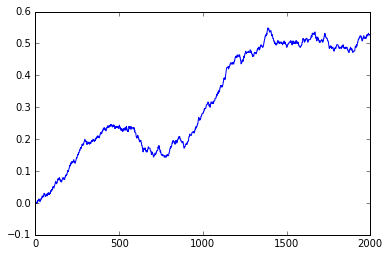

In [36]:
print "Q Values Learned", Q
plt.plot(avg_rewards)